# Malware Diagnosis In Computer Systems

Link to download the dataset:

https://drive.google.com/file/d/1AjGMY5XWe5J2k3eZlqevdvNidjQO__6I/view?usp=sharing

Download and put it in same folder as the 'Malware_Diagnosis_In_Computer_Systems.ipynb'

## Import the required Python libraries

In [1]:
# Import the required Python libraries 

import dask
import random
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import dask.dataframe as dd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, accuracy_score
from time import time
#plt.style.use('dark_background')


## Read the Dataset

In [2]:
data_types = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
# # Import the train dataset
# # df = dd.read_csv("drive/My Drive/Data ML/train.csv",dtype=data_types)
dask_data = dd.read_csv("train.csv", dtype=data_types)
data_df = dask_data.compute()

print('Shape of Dataset: {}'.format(data_df.shape))
data_df.head(5)

# # Take a sample from the train dataset
# ndf = train.iloc[:89214,:]

# # Export the sample train dataset
# ndf.to_csv('train_sample.csv')

# ndf = pd.read_csv("drive/My Drive/ML_Project/train_sample.csv", dtype=data_types)
# ndf

Shape of Dataset: (8921483, 83)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


# Analysint Dataset and Making Inferences

In [4]:
df_copy=data_df.copy(deep=True)

In [5]:
df_copy.ProductName.unique()

['win8defender', 'mse', 'mseprerelease', 'windowsintune', 'fep', 'scep']
Categories (6, object): ['mse', 'win8defender', 'mseprerelease', 'windowsintune', 'fep', 'scep']

In [6]:
df_copy[df_copy.HasDetections == 1].pivot_table('HasDetections',index='ProductName',columns='IsBeta',aggfunc='count').fillna(0)

IsBeta,0,1
ProductName,,
mse,45958,3
win8defender,4412887,4
mseprerelease,0,26
windowsintune,1,0
fep,3,0
scep,10,0


**Inference :** 
This shows that machine installed with non-beta version of "win8defender" experience most malwares failures.

In [7]:
df_copy[df_copy.HasDetections == 0].pivot_table('HasDetections',index='ProductName',columns='IsBeta',aggfunc='count').fillna(0)

IsBeta,0,1
ProductName,,
mse,48909,3
win8defender,4413625,4
mseprerelease,0,27
windowsintune,7,0
fep,4,0
scep,12,0


However, we can see that there are approximately equal number of machines with non-beta ver of win8defender that has not experienced any malwares or failures. Therefore, we can rule out the possibility that the presence of this particular product on machine has anything to do with malwares. It also motivates us to explore the other factors for our analysis.

Let's see if Engine Version of Win8Defender has anything to do with Malwares ?

In [8]:
df_copy.EngineVersion.unique()

['1.1.15100.1', '1.1.14600.4', '1.1.15200.1', '1.1.15300.6', '1.1.13504.0', ..., '1.1.13301.0', '1.1.11202.0', '1.1.11104.0', '1.1.12802.0', '1.1.10701.0']
Length: 70
Categories (70, object): ['1.1.12805.0', '1.1.12902.0', '1.1.13000.0', '1.1.13103.0', ..., '1.1.11202.0', '1.1.11104.0', '1.1.12802.0', '1.1.10701.0']

In [9]:
# Top 10 Popular EngineVersions of win8Defender
df_copy[df_copy.ProductName == 'win8defender'].EngineVersion.value_counts().nlargest(10)

1.1.15200.1    3800409
1.1.15100.1    3636724
1.1.15000.2     261590
1.1.14901.4     210011
1.1.14600.4     160081
1.1.14800.3     135095
1.1.15300.6     119278
1.1.14104.0      93832
1.1.13504.0      70609
1.1.15300.5      68699
Name: EngineVersion, dtype: int64

In [10]:
df_copy.IsProtected = df_copy.IsProtected.fillna(2.0)
# Here 2 means NO AVP Installed

In [11]:
by_protection = df_copy[df_copy.ProductName == 'win8defender'].groupby(['IsProtected','EngineVersion','HasDetections']).size().unstack()

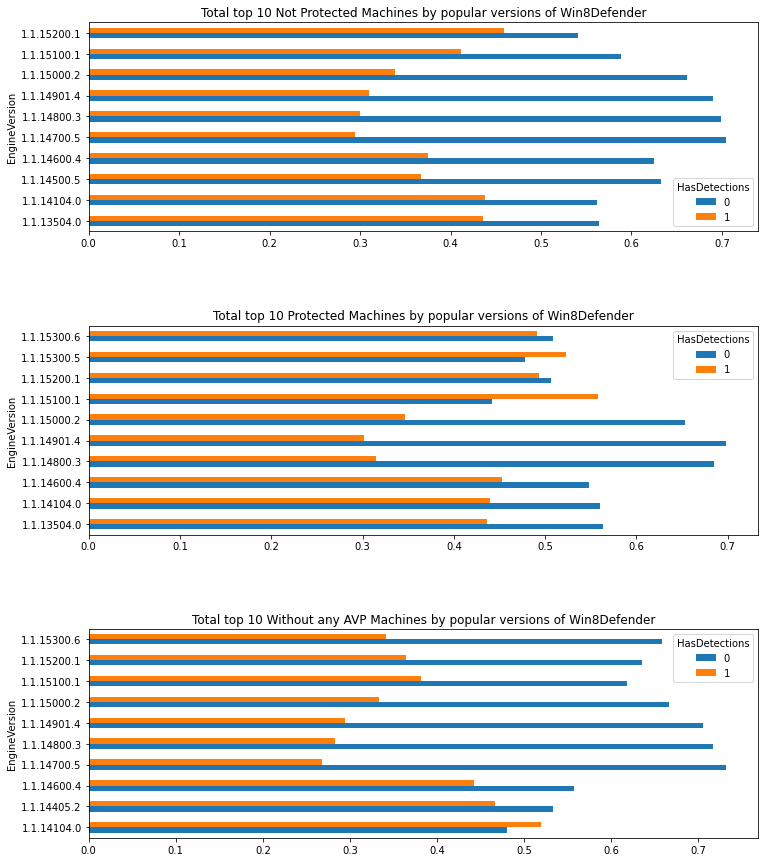

In [12]:
fig,ax = plt.subplots(3,1,figsize=(12,15))
for i in range(3):
    frame = by_protection.loc[i]
    frame = frame[frame.index.isin(frame.sum(1).nlargest(10).index)].sort_index()
    frame = frame.div(frame.sum(1),axis=0)
    frame.plot(kind='barh',ax=ax[i])
    
ax[0].set_title('Total top 10 Not Protected Machines by popular versions of Win8Defender')
ax[1].set_title('Total top 10 Protected Machines by popular versions of Win8Defender')
ax[2].set_title('Total top 10 Without any AVP Machines by popular versions of Win8Defender')
plt.subplots_adjust(hspace=0.45)

**Total top 10 Not Protected Machines by popular versions of Win8Defender**

This horizontal bar graphs shows the percentage of total machines, categorized by the status of malware detections, running Win8Defender and an AV Program which is either currently active but not receiving updates or has no other AVP, sorted by the popular versions of Win8D.

Here we can see that the machines running on version 1.1.151000.2, 1.1.14901.4, 1.1.14800.3 and 1.1.14700.5 had performed really well as the large % of the machines hadn't detected any malware/failure in their respective cases.

However, the performance of machine with much updated ver. 1.1.15200.1 is not as great as their predecessors as there is a small gap between percent of machines that had either detected or not detected malwares.

**Total top 10 Protected Machines by popular versions of Win8Defender**

This horizontal bar graphs shows the percentage of total machines, categorized by the status of malware detections, running Win8Defender and atleast one active and updated Anti Virus Program, sorted by the popular versions of Win8D.

The graph depicts that as the version of Win8Defender gets updated after ver. 1.1.15000.2, the performance of machines degraded as the gap between the percentage of malware infected and not-infected machines decreases.

One more interesting fact that one can infer by combining this graph's result with above graph's result is that there had been a significant decrease in the machine's performance running ver 1.1.15100.1 as more systems had detected malwares as compared to the previous scenario.

**Total top 10 Without any AVP Machines by popular versions of Win8Defender**

This horizontal bar graphs shows the percentage of total machines, categorized by the status of malware detections, running Win8Defender and without any Anti Virus Program, sorted by the popular versions of Win8D.

Here we can observe that machine solely running ver 1.1.14104.0 gets more prone to malwares as compared to the two previous cases.

In [13]:
df_copy.Firewall.value_counts()

1.0    8641014
0.0     189119
Name: Firewall, dtype: int64

In [14]:
df_copy[df_copy.ProductName == 'win8defender'].groupby(['Firewall','HasDetections']).size().unstack()

HasDetections,0,1
Firewall,,
0.0,96093,92275
1.0,4311162,4315706


In [15]:
# Machines running OS ver Windows 8.1 or above & win8defender 
win8devices_abv = df_copy[(df_copy.ProductName == 'win8defender') & (df_copy.Firewall == 1)]

In [16]:
win8devices_abv.shape

(8626868, 83)

In [17]:
win8devices_abv.Census_DeviceFamily.value_counts()

Windows.Desktop    8617465
Windows.Server        9388
Windows                 15
Name: Census_DeviceFamily, dtype: int64

<AxesSubplot:title={'center':'Machines Prone to malwares by Device Family '}, ylabel='Census_DeviceFamily'>

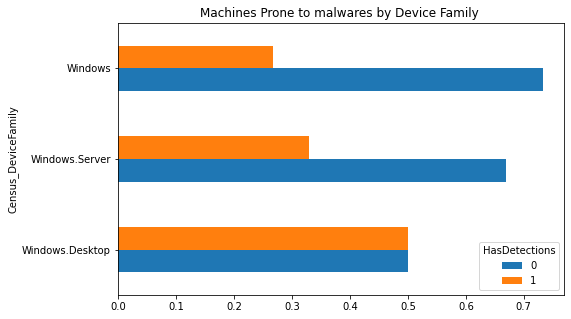

In [18]:
by_devicefamily = win8devices_abv.groupby(['Census_DeviceFamily','HasDetections']).size().unstack()
by_devicefamily = by_devicefamily.div(by_devicefamily.sum(1),axis=0)
fig,ax = plt.subplots(1,1,figsize=(8,5))
by_devicefamily.plot(ax=ax,kind='barh',title='Machines Prone to malwares by Device Family ')

In [19]:
win8devices_abv.SmartScreen.value_counts()

RequireAdmin    4231612
ExistsNotSet    1015936
Off              169758
Warn             132195
Prompt            33559
Block             22147
off                1244
On                  722
&#x02;              404
&#x01;              324
on                  146
requireadmin         10
OFF                   4
0                     3
Promt                 2
Enabled               1
prompt                1
warn                  1
00000000              1
requireAdmin          1
&#x03;                1
Name: SmartScreen, dtype: int64

In [20]:
win8devices_abv.SmartScreen = win8devices_abv.SmartScreen.replace({'requireadmin':'RequireAdmin','OFF':'off',
                                   'on':'On','prompt':'Prompt','Promt':'Prompt',
                                   '0':'off','Enabled':'On','requireAdmin':'RequireAdmin',
                                    'warn':'Warn','Off':'off'})
win8devices_abv.SmartScreen.value_counts()

/var/folders/_x/wnx6fswx6fn4_dkfpm2j_cfc0000gn/T/ipykernel_24575/1596339186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win8devices_abv.SmartScreen = win8devices_abv.SmartScreen.replace({'requireadmin':'RequireAdmin','OFF':'off',


RequireAdmin    4231623
ExistsNotSet    1015936
off              171009
Warn             132196
Prompt            33562
Block             22147
On                  869
&#x02;              404
&#x01;              324
00000000              1
&#x03;                1
Name: SmartScreen, dtype: int64

In [21]:
SmartSGrp = win8devices_abv.groupby(['Census_DeviceFamily','SmartScreen','HasDetections']).size().unstack().fillna(0)

In [22]:
subSG = SmartSGrp.loc['Windows.Desktop'].iloc[4:].fillna(0)
subSG=subSG.iloc[:5]


<AxesSubplot:title={'center':'Windows Desktop devices Malware Conditions by SmartScreen status'}, ylabel='SmartScreen'>

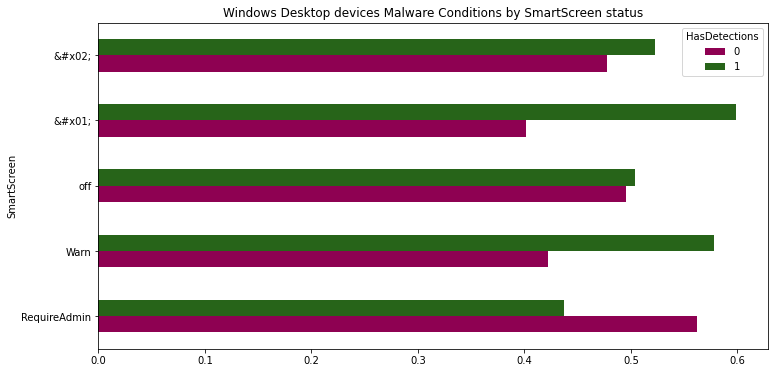

In [23]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
subSG.div(subSG.sum(1),axis=0).plot(kind='barh',ax=ax,colormap='PiYG',
                                    title='Windows Desktop devices Malware Conditions by SmartScreen status')

This graph shows that SmartScreen does not play much significant role in preventing malwares in case of Windows Desktop Machines. Because no matter whether a Smart Screen is ON,OFF,Blocked or Not set, desktop mostly get attacked by malwares.

## Perform Exploratory Data Analysis

In [24]:
# Define the helper functions

def find_total_distinct_values(df, column):
  '''
  To calculate the cardinality of the given column
  '''
  return df[column].nunique()


### Step 1: Analyze the target label distribution

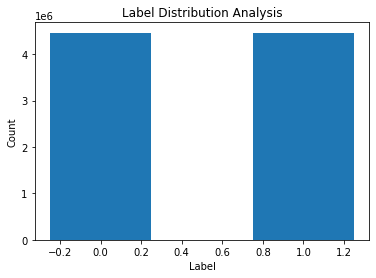

In [25]:
# Check the number of cases present for each label
label_distribution = {0: data_df[data_df['HasDetections'] == 0].shape[0], 
                      1: data_df[data_df['HasDetections'] == 1].shape[0]}

# Plot the label distribution
plt.bar(list(label_distribution.keys()), list(label_distribution.values()), width=0.5)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution Analysis')
plt.show()

### Observation 

As observed from the above graph, we can deduce that the dataset is in favor of training our model as the label distribution is uniform.



### Step 2: Analyze the datatype distribution across all features in the dataset

In [38]:
# Define the helper functions

def get_binary_features(df):
  '''
  To return a list of binary features/columns
  '''
  return [c for c in df.columns if df[c].nunique() == 2]


def get_numeric_features(df):
  '''
  To return a list of numeric features/columns
  '''
  return ['Census_ProcessorCoreCount',
          'Census_PrimaryDiskTotalCapacity',
          'Census_SystemVolumeTotalCapacity',
          'Census_TotalPhysicalRAM',
          'Census_InternalPrimaryDiagonalDisplaySizeInInches',
          'Census_InternalPrimaryDisplayResolutionHorizontal',
          'Census_InternalPrimaryDisplayResolutionVertical',
          'Census_InternalBatteryNumberOfCharges']


def get_categorical_features(df):
  '''
  To return a list of categorical features/columns
  '''
  binary_features = get_binary_features(df)
  numeric_features = get_numeric_features(df)
  return [c for c in df.columns if (c not in binary_features) and (c not in numeric_features)]


# Fetch the datatype distribution for all the features
data_type_distribution = {}
data_type_distribution['Binary'] = len(get_binary_features(data_df))
data_type_distribution['Numeric'] = len(get_numeric_features(data_df))
data_type_distribution['Categorical'] = len(data_df.columns) - data_type_distribution['Binary'] - data_type_distribution['Numeric']


df_data_types = pd.DataFrame([data_type_distribution])
df_data_types

,Binary,Numeric,Categorical
0,21,8,54


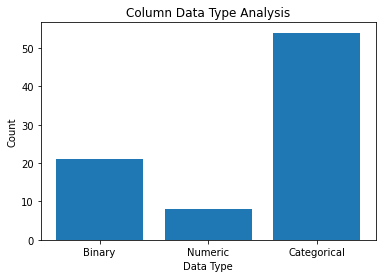

In [27]:
# Visualize the distribution using a bar chart
plt.bar(list(data_type_distribution.keys()), list(data_type_distribution.values()))
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.title('Column Data Type Analysis')
plt.show()


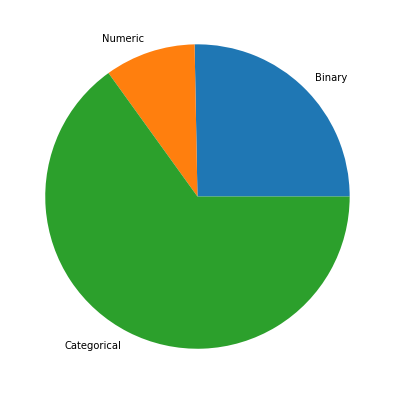

In [28]:
plt.figure(figsize=(7, 7))
mylabels = list(data_type_distribution.keys())
plt.pie(list(data_type_distribution.values()),labels = mylabels)
plt.show()

## Perform Data Wrangling

### Step 1: Analyze the missing value distribution across all the features 

In [29]:
def fetch_missing_values(df):
  '''
  To calculate and return the count and percentage of missing values in each column
  '''
  # Calculate the total cost
  total_missing_values = df.isnull().sum()

  # Calculate the percentage
  missing_values_percentage = 100 * total_missing_values / len(df)

  # Concatenate the results
  missing_value_df = pd.concat([total_missing_values, missing_values_percentage], axis=1).rename(columns={0: 'Count', 1: 'Percentage'})
  
  return missing_value_df

# Analyze the missing values in each columns
missing_value_analysis = fetch_missing_values(data_df).sort_values(by='Percentage', ascending=False)
missing_value_analysis

,Count,Percentage
PuaMode,8919174,99.974119
Census_ProcessorClass,8884852,99.589407
DefaultBrowsersIdentifier,8488045,95.141637
Census_IsFlightingInternal,7408759,83.044030
Census_InternalBatteryType,6338429,71.046809
...,...,...
ProductName,0,0.000000
Census_HasOpticalDiskDrive,0,0.000000
Census_OSVersion,0,0.000000
Census_OSArchitecture,0,0.000000


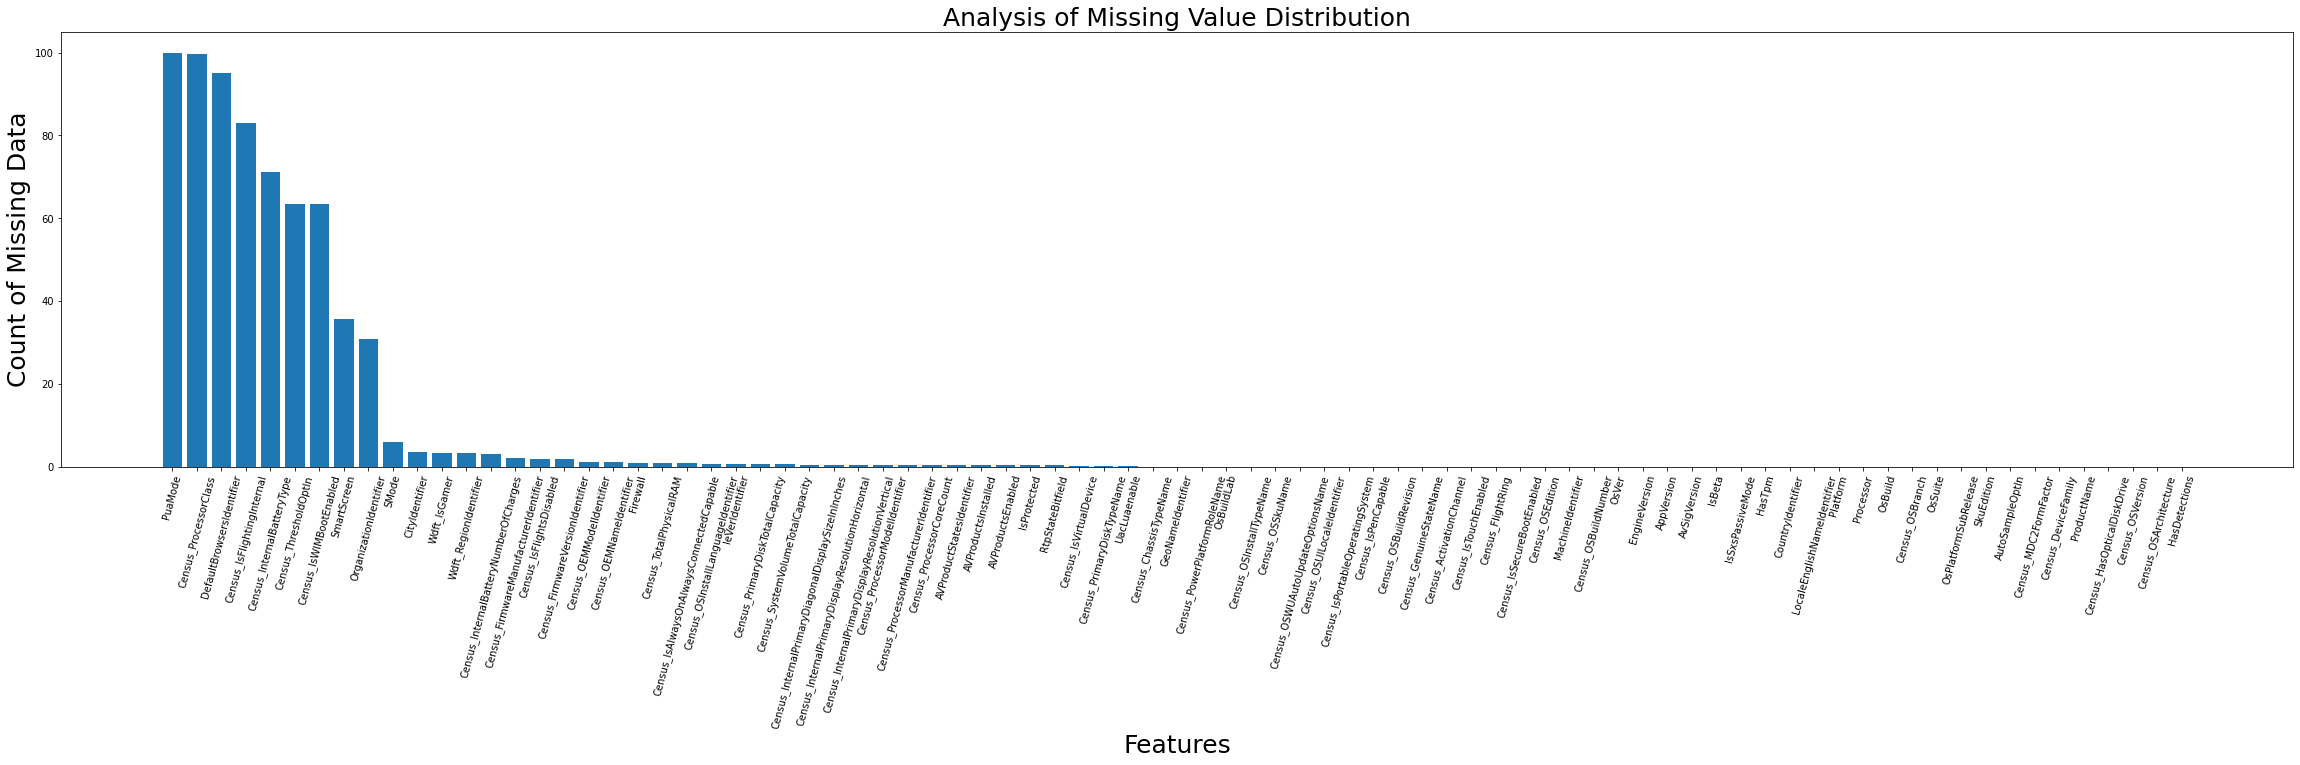

In [30]:
# Prepare the data for visualization
column_names = []
missing_percentage = []
for row_index in missing_value_analysis.index:
  column_names.append(row_index)
  missing_percentage.append(missing_value_analysis['Percentage'][row_index])


# Visualize the distribution using a bar chart
f, ax = plt.subplots(figsize=(40, 8))
plt.bar(column_names, missing_percentage)
plt.xlabel('Features', fontsize=25)
plt.ylabel('Count of Missing Data', fontsize=25)
plt.title('Analysis of Missing Value Distribution', fontsize=25)
plt.xticks(rotation=75)
plt.show()

#### Observation 

By analyzing all the features from the sample dataset, we find that most features have high data fill rate.

However, the few features having significant percentage of missing values should ideally be removed for better model accuracy.

In [31]:
# Identify the columns to remove assuming an acceptable missing value threshold of 40%
missing_columns = missing_value_analysis.loc[missing_value_analysis['Percentage'] >= 40].index
missing_columns

Index(['PuaMode', 'Census_ProcessorClass', 'DefaultBrowsersIdentifier',
       'Census_IsFlightingInternal', 'Census_InternalBatteryType',
       'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled'],
      dtype='object')

In [32]:
# Remove the selected columns
step_1_data = data_df.drop(list(missing_columns), axis = 1)
# ndf.drop(['Unnamed: 0'], axis = 1, inplace=True)
step_1_data.shape

(8921483, 76)

### Step 2: Analyze the features based on their cardinality

In [33]:
# Find the cardinality for each feature
feature_names = []
cardinalities = []

for feature in step_1_data.columns:
  feature_names.append(feature)
  cardinalities.append(find_total_distinct_values(step_1_data, feature))

feature_cardinalities = pd.DataFrame(list(zip(feature_names, cardinalities)), columns=['Feature', 'Cardinality'])
feature_cardinalities = feature_cardinalities.sort_values(by='Cardinality', ascending=False)
feature_cardinalities

,Feature,Cardinality
0,MachineIdentifier,8921483
41,Census_SystemVolumeTotalCapacity,536848
35,Census_OEMModelIdentifier,175365
13,CityIdentifier,107366
67,Census_FirmwareVersionIdentifier,50494
...,...,...
30,Firewall,2
27,SMode,2
26,AutoSampleOptIn,2
25,IsProtected,2


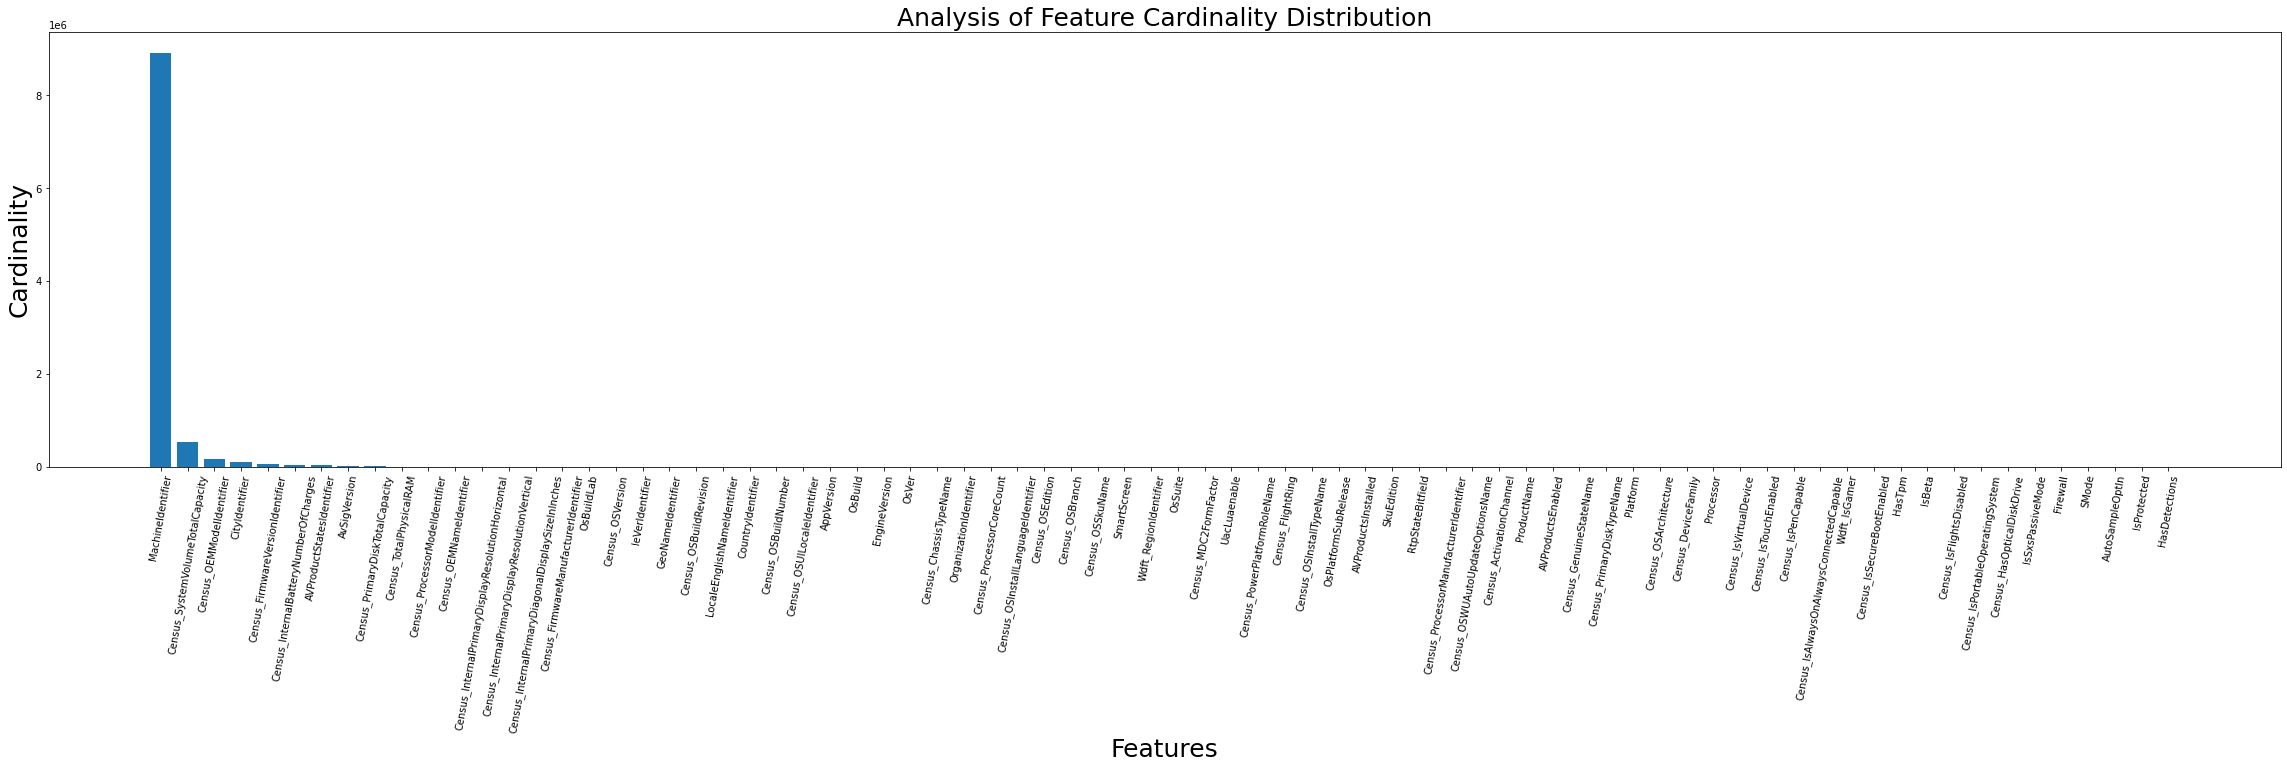

In [34]:
# Plot the distribution of feature cardinalities
f, ax = plt.subplots(figsize=(40, 8))
plt.bar(feature_cardinalities['Feature'], feature_cardinalities['Cardinality'])
plt.xlabel('Features', fontsize=25)
plt.ylabel('Cardinality', fontsize=25)
plt.title('Analysis of Feature Cardinality Distribution', fontsize=25)
plt.xticks(rotation=80)
plt.show()

In [35]:
# Identify the columns to remove assuming an acceptable cardinality threshold of 500
high_cardinality_columns = list(feature_cardinalities.loc[feature_cardinalities['Cardinality'] >= 500]['Feature'])
high_cardinality_columns

['MachineIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'Census_OEMModelIdentifier',
 'CityIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_InternalBatteryNumberOfCharges',
 'AVProductStatesIdentifier',
 'AvSigVersion',
 'Census_PrimaryDiskTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ProcessorModelIdentifier',
 'Census_OEMNameIdentifier',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_FirmwareManufacturerIdentifier',
 'OsBuildLab']

In [36]:
# Remove the selected columns
step_2_data = step_1_data.drop(list(high_cardinality_columns), axis = 1)
# ndf.drop(['Unnamed: 0'], axis = 1, inplace=True)
step_2_data.shape

(8921483, 59)

### Observation 

By performing the above analysis on the feature cardinality, we identify that some features have significantly higher categorical values leading to their respective high cardinality values.

High cardinality often becomes a hurdle in the model's performance, as the training samples will become too sparse for the model to learn from. Therefore, such features with high cardinalities must be removed in order to gain better accuracy while performing binary classification task of malware diagnosis.

### Step 3: Analyze the correlation of each feature with the target label

In [37]:
# Find the correlation of each feature with the target label
feature_names = []
correlation = []

# Extract a sample of the dataset to find the correlation coefficients
sample_data_size = round(0.01 * len(step_2_data))
corr_dataset = step_2_data.sample(n=sample_data_size)

for feature in corr_dataset.columns:
  feature_names.append(feature)
  try:
    correlation.append(corr_dataset[feature].corr(corr_dataset['HasDetections']))
  except:
    corr_dataset[feature] = corr_dataset[feature].astype('category').cat.codes
    correlation.append(corr_dataset[feature].corr(corr_dataset['HasDetections']))

feature_correlation = pd.DataFrame(list(zip(feature_names, correlation)), columns=['Feature', 'Correlation'])
feature_correlation = feature_correlation.sort_values(by='Correlation', ascending=False)
feature_correlation

,Feature,Correlation
58,HasDetections,1.000000
20,IsProtected,0.058313
1,EngineVersion,0.058153
29,Census_ProcessorCoreCount,0.055045
56,Wdft_IsGamer,0.053055
4,RtpStateBitfield,0.040769
35,Census_OSVersion,0.030500
41,Census_OSSkuName,0.030375
40,Census_OSEdition,0.030356
38,Census_OSBuildNumber,0.028058


In [39]:
# Identify the columns to remove
negligible_correlation_columns = list(feature_correlation.loc[abs(feature_correlation['Correlation']) < 0.012]['Feature'])
negligible_correlation_columns

['AppVersion',
 'Firewall',
 'Census_GenuineStateName',
 'GeoNameIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'UacLuaenable',
 'AutoSampleOptIn',
 'CountryIdentifier',
 'OrganizationIdentifier',
 'Census_IsPortableOperatingSystem',
 'OsVer',
 'Platform',
 'Census_OSInstallLanguageIdentifier',
 'HasTpm',
 'Census_OSUILocaleIdentifier',
 'Census_IsSecureBootEnabled',
 'ProductName',
 'Census_OSBuildRevision',
 'Census_DeviceFamily',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_FlightRing']

In [40]:
# Remove the selected columns
step_3_data = step_2_data.drop(list(negligible_correlation_columns), axis = 1)
# ndf.drop(['Unnamed: 0'], axis = 1, inplace=True)
step_3_data.shape

(8921483, 38)

# Prepare data for training classification models

In [41]:
def split_stratified_into_train_val_test(input_df, label='HasDetections', train_fraction=0.6, validation_fraction=0.2, test_fraction=0.2):
    '''
    To split a dataframe into three subsets (train, val, and test) maintaining the original label distribution
    '''
    # Check if the fractions are legit
    if train_fraction + validation_fraction + test_fraction != 1.0:
        raise ValueError('Illegitimate fractions received. Sum not equal to 1.')

    if label not in input_df.columns:
        raise ValueError('Target label is not present in the input dataframe.')

    X = input_df 
    y = input_df[[label]] 

    # Split the input dataframe into train and temp dataframes.
    X_train, df_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=(1.0-train_fraction))

    # Split the temp dataframe into validation and test dataframes.
    relative_test_fraction = test_fraction / (validation_fraction + test_fraction)
    X_val, X_test, y_val, y_test = train_test_split(df_temp, y_temp, stratify=y_temp, test_size=relative_test_fraction)

    if len(input_df) != len(X_train) + len(X_val) + len(X_test):
      print('Train, Test and Validation Split Found Unsuccessful!')

    return X_train, X_val, X_test

# Remove the rows with NA entries
# clean_dataset = ndf.dropna()
# clean_dataset = step_3_data.dropna()
clean_dataset = step_2_data.dropna()
clean_dataset.shape

(3521084, 59)

In [42]:
# Using Label Encoder on categorical columns of datset

from sklearn.preprocessing import LabelEncoder
cat_col=[]
for col in clean_dataset.columns:
    if(clean_dataset[col].dtypes=='category'):
        cat_col.append(col)
df_col=list(cat_col)
cc=list(clean_dataset.columns)

for i in range(len(df_col)):
    clean_dataset[df_col[i]] = LabelEncoder().fit_transform(clean_dataset[df_col[i]])

/var/folders/_x/wnx6fswx6fn4_dkfpm2j_cfc0000gn/T/ipykernel_24575/2196460023.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dataset[df_col[i]] = LabelEncoder().fit_transform(clean_dataset[df_col[i]])


In [43]:
clean_dataset

,ProductName,EngineVersion,AppVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_IsFlightsDisabled,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
2,1,53,56,0,7.0,0,1.0,1.0,1,86,...,0.0,5,0,0.0,0,0,0.0,0.0,3.0,0
5,1,53,56,0,7.0,0,1.0,1.0,1,97,...,0.0,5,0,0.0,0,0,0.0,0.0,15.0,1
7,1,53,56,0,7.0,0,1.0,1.0,1,97,...,0.0,5,0,0.0,0,0,0.0,0.0,15.0,0
8,1,54,56,0,7.0,0,1.0,1.0,1,164,...,0.0,5,0,0.0,0,0,0.0,0.0,15.0,0
14,1,53,56,0,7.0,0,2.0,1.0,1,169,...,0.0,5,0,0.0,0,0,0.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131186,1,53,50,0,7.0,0,1.0,1.0,1,89,...,0.0,5,1,0.0,0,0,0.0,0.0,1.0,1
131187,1,54,29,0,7.0,0,2.0,1.0,1,164,...,0.0,5,0,0.0,0,0,0.0,0.0,15.0,1
131188,1,53,74,0,7.0,0,1.0,1.0,1,57,...,0.0,2,0,0.0,0,0,0.0,0.0,10.0,0
131199,1,53,56,0,7.0,0,1.0,1.0,1,66,...,0.0,5,0,0.0,0,0,0.0,0.0,5.0,1


In [44]:
# # Separate the features from the label
# model_labels = clean_dataset['HasDetections']
# model_features = clean_dataset.drop(['HasDetections'], axis=1)

# # Peform a random train and validation split
# X_train, X_test, y_train, y_test = train_test_split(model_features, model_labels, test_size=0.2)

# Split the dataset into training, validation, and test datasets
sample_data_s=pd.read_csv('sample.csv')
sample_data_s.drop('Unnamed: 0', inplace=True, axis=1)
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(sample_data_s.iloc[:,:-1], sample_data_s.iloc[:,-1], test_size=0.1)
X_train, X_val, X_test = split_stratified_into_train_val_test(clean_dataset, label='HasDetections', train_fraction=0.6, validation_fraction=0.2, test_fraction=0.2)
print('Shape of Training dataset: {}'.format(X_train.shape))
print('Shape of Validation dataset: {}'.format(X_val.shape))
print('Shape of Test dataset: {}'.format(X_test.shape))
print('-------------------------------------')


# Segregate the training features and their respective target labels
y_train = X_train['HasDetections']
X_train = X_train.drop(['HasDetections'], axis=1)

# Segregate the validation features and their respective target labels
y_val = X_val['HasDetections']
X_val = X_val.drop(['HasDetections'], axis=1)

# Segregate the test features and their respective target labels
y_test = X_test['HasDetections']
X_test = X_test.drop(['HasDetections'], axis=1)

print('Shape of Train Features: {}'.format(X_train.shape))
print('Shape of Train Labels: {}'.format(y_train.shape))
print('-------------------------------------')
print('Shape of Validation Features: {}'.format(X_val.shape))
print('Shape of Validation Labels: {}'.format(y_val.shape))
print('-------------------------------------')
print('Shape of Test Features: {}'.format(X_test.shape))
print('Shape of Test Labels: {}'.format(y_test.shape))

Shape of Training dataset: (2112650, 59)
Shape of Validation dataset: (704217, 59)
Shape of Test dataset: (704217, 59)
-------------------------------------
Shape of Train Features: (2112650, 58)
Shape of Train Labels: (2112650,)
-------------------------------------
Shape of Validation Features: (704217, 58)
Shape of Validation Labels: (704217,)
-------------------------------------
Shape of Test Features: (704217, 58)
Shape of Test Labels: (704217,)


**Distribution plot of data among Training Test and Validation Data**

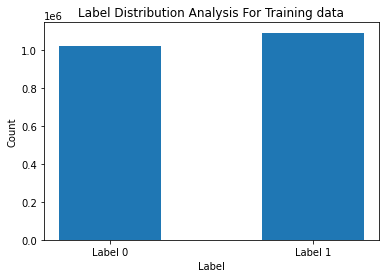

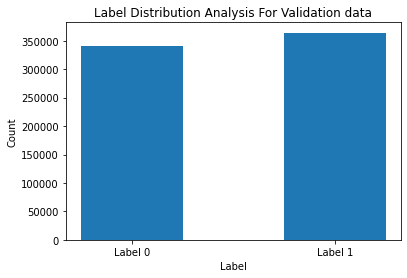

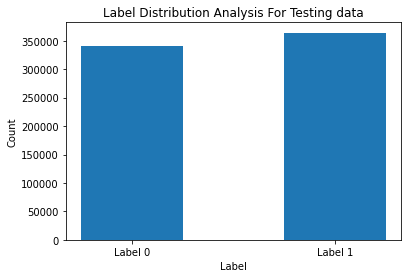

In [45]:
x=['Label 0','Label 1']
y_tran_g=[0,0]
y_val_g=[0,0]
y_test_g=[0,0]
for i in range(len(y_train)):
    y_tran_g[int(y_train.values[i])]+=1
for i in range(len(y_val)):
    y_val_g[int(y_val.values[i])]+=1
for i in range(len(y_test)):
    y_test_g[int(y_test.values[i])]+=1

plt.bar(x, y_tran_g, width=0.5)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution Analysis For Training data')
plt.show()

plt.bar(x, y_val_g, width=0.5)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution Analysis For Validation data')
plt.show()

plt.bar(x, y_test_g, width=0.5)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution Analysis For Testing data')
plt.show()

We have ensured during splitting of dataset that the distribution remain uniform to avoid biases during training.

## Random Classifier

In [46]:
# Fetch the training predictions
y_train_pred = []
for _ in range(len(X_train)):
   y_train_pred.append(random.randint(0,1))

# Fetch the validation predictions
y_val_pred = []
for _ in range(len(X_val)):
   y_val_pred.append(random.randint(0,1))

# Fetch the test predictions
y_test_pred = []
for _ in range(len(X_test)):
   y_test_pred.append(random.randint(0,1))

y_train_store,y_valid_store,y_test_store=[],[],[]

In [47]:
random_classifier_train_accuracy = round(100 * accuracy_score(y_train, y_train_pred), 2)
print('Accuracy achieved over Training data is {}%'.format(random_classifier_train_accuracy))
y_train_store.append(random_classifier_train_accuracy)

random_classifier_val_accuracy = round(100 * accuracy_score(y_val, y_val_pred), 2)
print('Accuracy achieved over Validation data is {}%'.format(random_classifier_val_accuracy))
y_valid_store.append(random_classifier_val_accuracy)

random_classifier_test_accuracy = round(100 * accuracy_score(y_test, y_test_pred), 2)
print('Train Accuracy achieved over Test data is {}%'.format(random_classifier_test_accuracy))
y_test_store.append(random_classifier_test_accuracy)

Accuracy achieved over Training data is 49.99%
Accuracy achieved over Validation data is 50.02%
Train Accuracy achieved over Test data is 50.03%


## Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': [60,80,100,120,140,160]}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [115]:
dtree_grid_search(X_train_sample,y_train_sample,2)

{'criterion': 'entropy', 'max_depth': 100}

In [48]:
time_store=[]
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=100, min_samples_split=100)
t1=time()
dt_model.fit(X_train, y_train)
t2=time()
time_store.append(t2-t1)

In [49]:
# Fetch the training predictions
y_train_pred = dt_model.predict(X_train)

# Fetch the validation predictions
y_val_pred = dt_model.predict(X_val)

# Fetch the test predictions
y_test_pred = dt_model.predict(X_test)

decision_tree_classifier_train_accuracy = round(100 * accuracy_score(y_train, y_train_pred), 2)
print('Accuracy achieved over Training data is {}%'.format(decision_tree_classifier_train_accuracy))
y_train_store.append(decision_tree_classifier_train_accuracy)

decision_tree_classifier_val_accuracy = round(100 * accuracy_score(y_val, y_val_pred), 2)
print('Accuracy achieved over Validation data is {}%'.format(decision_tree_classifier_val_accuracy))
y_valid_store.append(decision_tree_classifier_val_accuracy)

decision_tree_classifier_test_accuracy = round(100 * accuracy_score(y_test, y_test_pred), 2)
print('Accuracy achieved over Test data is {}%'.format(decision_tree_classifier_test_accuracy))
y_test_store.append(decision_tree_classifier_test_accuracy)

Accuracy achieved over Training data is 72.22%
Accuracy achieved over Validation data is 63.72%
Accuracy achieved over Test data is 63.72%


# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_dt= RandomForestClassifier(n_estimators= 20, criterion="entropy")  
t1=time()
rf_dt.fit(X_train, y_train) 
t2=time()
time_store.append(t2-t1)

In [51]:
# Fetch the training predictions
y_train_pred = rf_dt.predict(X_train)

# Fetch the validation predictions
y_val_pred = rf_dt.predict(X_val)

# Fetch the test predictions
y_test_pred = rf_dt.predict(X_test)

random_forest_classifier_train_accuracy = round(100 * accuracy_score(y_train, y_train_pred), 2)
print('Accuracy achieved over Training data is {}%'.format(random_forest_classifier_train_accuracy))
y_train_store.append(random_forest_classifier_train_accuracy)

random_forest_classifier_val_accuracy = round(100 * accuracy_score(y_val, y_val_pred), 2)
print('Accuracy achieved over Validation data is {}%'.format(random_forest_classifier_val_accuracy))
y_valid_store.append(random_forest_classifier_val_accuracy)

random_forest_classifier_test_accuracy = round(100 * accuracy_score(y_test, y_test_pred), 2)
print('Accuracy achieved over Test data is {}%'.format(random_forest_classifier_test_accuracy))
y_test_store.append(random_forest_classifier_test_accuracy)

Accuracy achieved over Training data is 97.33%
Accuracy achieved over Validation data is 63.96%
Accuracy achieved over Test data is 63.98%


# ANN

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.05)
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', mlp)])
t1=time()
pipe_mlp = pipe_mlp.fit(X_train, y_train)
t2=time()
time_store.append(t2-t1)

Iteration 1, loss = 0.62215749
Iteration 2, loss = 0.61646894
Iteration 3, loss = 0.61470293
Iteration 4, loss = 0.61220188
Iteration 5, loss = 0.61026377
Iteration 6, loss = 0.60967223
Iteration 7, loss = 0.60923337
Iteration 8, loss = 0.60886922
Iteration 9, loss = 0.60852591
Iteration 10, loss = 0.60828342
Iteration 11, loss = 0.60818107
Iteration 12, loss = 0.60802821
Iteration 13, loss = 0.60796281
Iteration 14, loss = 0.60779352
Iteration 15, loss = 0.60771148
Iteration 16, loss = 0.60765197
Iteration 17, loss = 0.60756010
Iteration 18, loss = 0.60754177
Iteration 19, loss = 0.60738341
Iteration 20, loss = 0.60737993


/Users/its_av/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
# Fetch the training predictions
y_train_pred = pipe_mlp.predict(X_train)

# Fetch the validation predictions
y_val_pred = pipe_mlp.predict(X_val)

# Fetch the test predictions
y_test_pred = pipe_mlp.predict(X_test)

ann_classifier_train_accuracy = round(100 * accuracy_score(y_train, y_train_pred), 2)
print('Accuracy achieved over Training data is {}%'.format(ann_classifier_train_accuracy))
y_train_store.append(ann_classifier_train_accuracy)

ann_classifier_val_accuracy = round(100 * accuracy_score(y_val, y_val_pred), 2)
print('Accuracy achieved over Validation data is {}%'.format(ann_classifier_val_accuracy))
y_valid_store.append(ann_classifier_val_accuracy)

ann_classifier_test_accuracy = round(100 * accuracy_score(y_test, y_test_pred), 2)
print('Accuracy achieved over Test data is {}%'.format(ann_classifier_test_accuracy))
y_test_store.append(ann_classifier_test_accuracy)

Accuracy achieved over Training data is 66.02%
Accuracy achieved over Validation data is 65.88%
Accuracy achieved over Test data is 65.94%


# Logistic

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [55]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])
t1=time()
pipe_lr = pipe_lr.fit(X_train, y_train)
t2=time()
time_store.append(t2-t1)

/Users/its_av/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Fetch the training predictions
y_train_pred = pipe_lr.predict(X_train)

# Fetch the validation predictions
y_val_pred =pipe_lr.predict(X_val)

# Fetch the test predictions
y_test_pred = pipe_lr.predict(X_test)

lg_classifier_train_accuracy = round(100 * accuracy_score(y_train, y_train_pred), 2)
print('Accuracy achieved over Training data is {}%'.format(lg_classifier_train_accuracy))
y_train_store.append(lg_classifier_train_accuracy)

lg_classifier_val_accuracy = round(100 * accuracy_score(y_val, y_val_pred), 2)
print('Accuracy achieved over Validation data is {}%'.format(lg_classifier_val_accuracy))
y_valid_store.append(lg_classifier_val_accuracy)

lg_classifier_test_accuracy = round(100 * accuracy_score(y_test, y_test_pred), 2)
print('Accuracy achieved over Test data is {}%'.format(lg_classifier_test_accuracy))
y_test_store.append(lg_classifier_test_accuracy)

Accuracy achieved over Training data is 63.82%
Accuracy achieved over Validation data is 63.93%
Accuracy achieved over Test data is 63.87%


# LightGBM Classifier with StratifiedKFold to improve training model

In [57]:
features = [f for f in X_train.columns if f not in ['index']]
seed = 6001
np.random.seed(seed)
random.seed(seed)

In [58]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = seed)
t1=time()
for n_fold, (trainXId, validXId) in enumerate(folds.split(X_train[features], y_train)):
    # Create TrainXY and ValidationXY set based on fold-indexes
    print('== Fold: ' + str(n_fold))
    # LightGBM parameters
    lgbm = LGBMClassifier(
        objective = 'binary',
        boosting_type = 'gbdt',
        n_estimators = 2500,
        learning_rate = 0.05, 
        num_leaves = 250,
        min_data_in_leaf = 125, 
        bagging_fraction = 0.901,
        max_depth = 13, 
        reg_alpha = 2.5,
        reg_lambda = 2.5,
        min_split_gain = 0.0001,
        min_child_weight = 25,
        feature_fraction = 0.5, 
        verbose = -1,
        n_jobs = -1) 

    lgbm.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric = 'auc', verbose = 250,early_stopping_rounds=5)

    #oofPreds[validXId] = lgbm.predict_proba(X_val, num_iteration = lgbm.best_iteration_)[:, 1]
    
    #print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(y_val, oofPreds[validXId])))
t2=time()
time_store.append(t2-t1)

== Fold: 0


/Users/its_av/Library/Python/3.8/lib/python/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/its_av/Library/Python/3.8/lib/python/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] bagging_fraction is set=0.901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.901
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[250]	training's auc: 0.750739	training's binary_logloss: 0.585746	valid_1's auc: 0.743382	valid_1's binary_logloss: 0.591406
[500]	training's auc: 0.758464	training's binary_logloss: 0.579344	valid_1's auc: 0.745385	valid_1's binary_logloss: 0.58964
== Fold: 1


/Users/its_av/Library/Python/3.8/lib/python/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/its_av/Library/Python/3.8/lib/python/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[250]	training's auc: 0.750739	training's binary_logloss: 0.585746	valid_1's auc: 0.743382	valid_1's binary_logloss: 0.591406
[500]	training's auc: 0.758464	training's binary_logloss: 0.579344	valid_1's auc: 0.745385	valid_1's binary_logloss: 0.58964
== Fold: 2


/Users/its_av/Library/Python/3.8/lib/python/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/its_av/Library/Python/3.8/lib/python/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[250]	training's auc: 0.750739	training's binary_logloss: 0.585746	valid_1's auc: 0.743382	valid_1's binary_logloss: 0.591406
[500]	training's auc: 0.758464	training's binary_logloss: 0.579344	valid_1's auc: 0.745385	valid_1's binary_logloss: 0.58964


In [59]:
# Fetch the training predictions
y_train_pred = lgbm.predict(X_train)

# Fetch the validation predictions
y_val_pred =lgbm.predict(X_val)

# Fetch the test predictions
y_test_pred = lgbm.predict(X_test)

lgbm_classifier_train_accuracy = round(100 * accuracy_score(y_train, y_train_pred), 2)
print('Accuracy achieved over Training data is {}%'.format(lgbm_classifier_train_accuracy))
y_train_store.append(lgbm_classifier_train_accuracy)

lgbm_classifier_val_accuracy = round(100 * accuracy_score(y_val, y_val_pred), 2)
print('Accuracy achieved over Validation data is {}%'.format(lgbm_classifier_val_accuracy))
y_valid_store.append(lgbm_classifier_val_accuracy)

lgbm_classifier_test_accuracy = round(100 * accuracy_score(y_test, y_test_pred), 2)
print('Accuracy achieved over Test data is {}%'.format(lgbm_classifier_test_accuracy))
y_test_store.append(lgbm_classifier_test_accuracy)

Accuracy achieved over Training data is 68.86%
Accuracy achieved over Validation data is 67.61%
Accuracy achieved over Test data is 67.64%


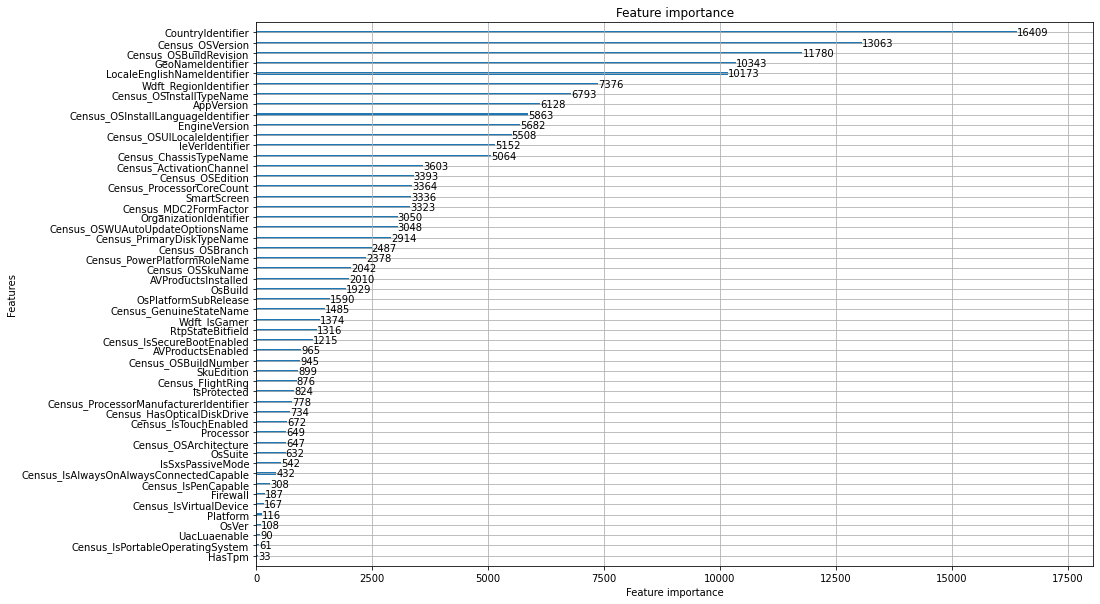

In [60]:
# Visualize the distribution of respective feature importance
lgb.plot_importance(lgbm, figsize=(15, 10))
plt.show()

In [61]:
# Evaluate the LGB model metrics
print('---------- Train ----------')
print(classification_report(y_train, y_train_pred, target_names=['HasDetections: 0', 'HasDetections: 1']))
print('---------- Test ----------')
print(classification_report(y_test, y_test_pred, target_names=['HasDetections: 0', 'HasDetections: 1']))

---------- Train ----------
                  precision    recall  f1-score   support

HasDetections: 0       0.67      0.71      0.69   1019996
HasDetections: 1       0.71      0.67      0.69   1092654

        accuracy                           0.69   2112650
       macro avg       0.69      0.69      0.69   2112650
    weighted avg       0.69      0.69      0.69   2112650

---------- Test ----------
                  precision    recall  f1-score   support

HasDetections: 0       0.66      0.70      0.67    339999
HasDetections: 1       0.70      0.66      0.68    364218

        accuracy                           0.68    704217
       macro avg       0.68      0.68      0.68    704217
    weighted avg       0.68      0.68      0.68    704217



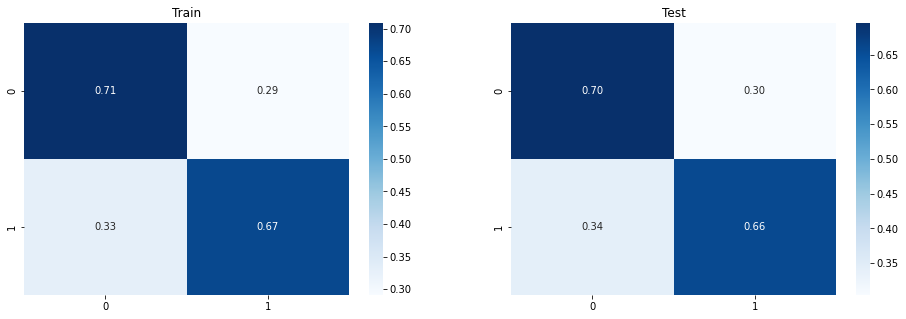

In [62]:
# Plot a confusion matrix to visualize the results
f, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
train_cnf_matrix = confusion_matrix(y_train, y_train_pred)
val_cnf_matrix = confusion_matrix(y_test, y_test_pred)

train_cnf_matrix_norm = train_cnf_matrix / train_cnf_matrix.sum(axis=1)[:, np.newaxis]
val_cnf_matrix_norm = val_cnf_matrix / val_cnf_matrix.sum(axis=1)[:, np.newaxis]

train_df_cm = pd.DataFrame(train_cnf_matrix_norm, index=[0, 1], columns=[0, 1])
val_df_cm = pd.DataFrame(val_cnf_matrix_norm, index=[0, 1], columns=[0, 1])

sns.heatmap(train_df_cm, annot=True, fmt='.2f', cmap="Blues", ax=axes[0]).set_title("Train")
sns.heatmap(val_df_cm, annot=True, fmt='.2f', cmap="Blues", ax=axes[1]).set_title("Test")
plt.show()

# Observations & Comparisons

In [63]:
X=['Random Classifier','Decision Tree','Random Forest','ANN','Logistic','LGBM']

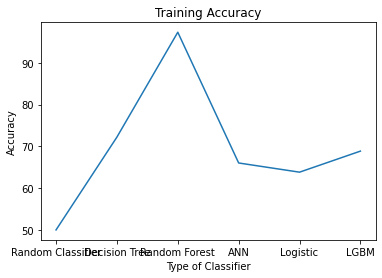

In [64]:
plt.plot(X,y_train_store)
plt.xlabel('Type of Classifier')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

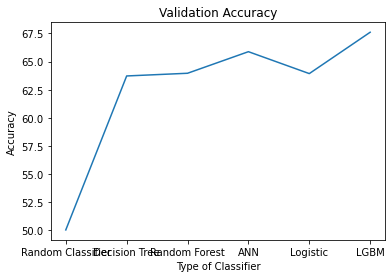

In [65]:
plt.plot(X,y_valid_store)
plt.xlabel('Type of Classifier')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.show()

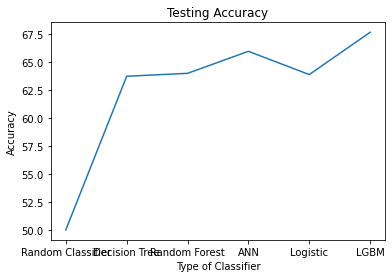

In [66]:
plt.plot(X,y_test_store)
plt.xlabel('Type of Classifier')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy')
plt.show()

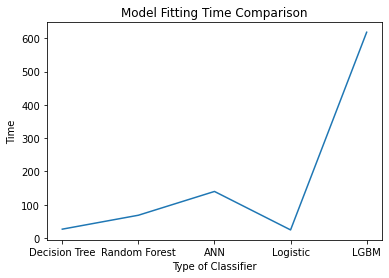

In [67]:
X=['Decision Tree','Random Forest','ANN','Logistic','LGBM']
plt.plot(X,time_store)
plt.xlabel('Type of Classifier')
plt.ylabel('Time')
plt.title('Model Fitting Time Comparison')
plt.show()